## Skin Cancer Detection, Melanoma - Using ResNET50

To build a ResNet based model which can accurately detect melanoma.

Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis. Accurate diagnosis requires expert dermatological evaluation, which might not be available in rural, underserved or low income regions.

There is need for accurate, fast and accessible AI-Based solution, hence the building of this model

### About ResNET50

The residual network (ResNet) is the CNN model that won the ILSVRC competition in 2015

ResNet50 refers to a deep neural network architecture that consists of 50 weight layers. It is primarily used to address the issue of low accuracy in shallow neural network classification.(ScienceDirect)

It was used widely in COVID-19 classification.

### Data Info

The dataset is taken from the ISIC (International Skin Image Collaboration) Archive. It consists of 5352 pictures of benign moles and 5353 pictures of malignant classified moles. The pictures have all been resized to low resolution (224x224x3) RGB. The task of this kernel is to create a model, which can classify a mole visually into benign and malignant.

As the dataset is pretty balanced, the model will be tested on the accuracy score, thus (TP + TN)/(ALL).

It has 2 different classes which are listed below :

1. Benign -- Not Dangerous
2. Malignant -- Dangerous

## Let's Bgin

### Import Necessary Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import os                       # for working with files
import seaborn as sns
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary  
import matplotlib.image as mpimg# for getting the summary of our model
import random

# from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Size our Image

In [3]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 2

Link our Data

In [5]:
train_dir = "/kaggle/input/skin-cancer-dataset/melanoma_cancer_dataset/train"
test_dir = "/kaggle/input/skin-cancer-dataset/melanoma_cancer_dataset/test"

In [6]:
# Set dataset path
dataset_path = "/kaggle/input/skin-cancer-dataset/melanoma_cancer_dataset/train"


# List class folders
classes = os.listdir(dataset_path)
print(f"Classes found: {classes}")

# Show class distribution
for cls in classes:
    count = len(os.listdir(os.path.join(dataset_path, cls)))
    print(f"{cls}: {count} images")

Classes found: ['benign', 'malignant']
benign: 5000 images
malignant: 4605 images


### Display Image of our Dataset

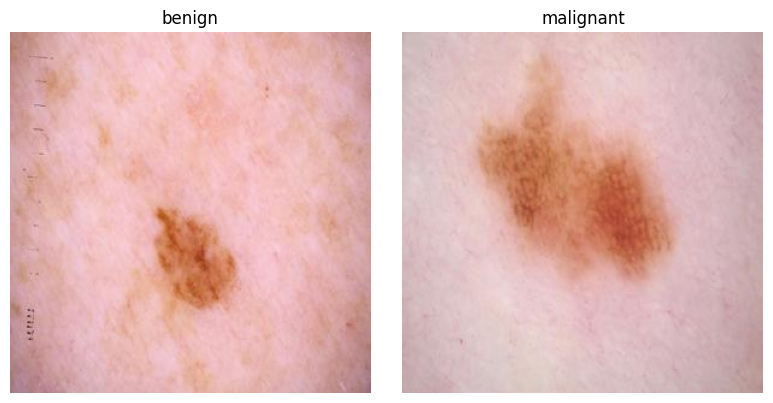

In [7]:
# Show random sample images from each class
fig, axes = plt.subplots(1, len(classes), figsize=(8, 4))
for i, cls in enumerate(classes):
    class_path = os.path.join(dataset_path, cls)
    sample_img = random.choice(os.listdir(class_path))
    img = mpimg.imread(os.path.join(class_path, sample_img))
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(cls)
plt.tight_layout()
plt.show()

## Count plot for our Images

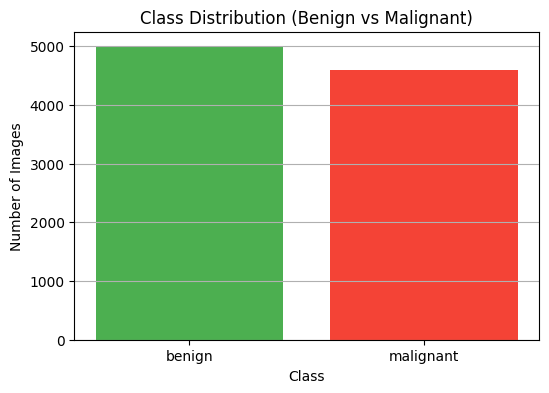

In [8]:
# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

# Plot
plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color=['#4CAF50', '#F44336'])
plt.title("Class Distribution (Benign vs Malignant)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.show()

In [9]:
train_gen = ImageDataGenerator(rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

### Our Data Attributes

In [11]:
print("Training data:")
train_data = train_gen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
# val_data = val_gen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
print("Testing data:")
test_data = test_gen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)


Training data:
Found 9605 images belonging to 2 classes.
Testing data:
Found 1000 images belonging to 2 classes.


### Build Model for ResNET50 

In [12]:
from tensorflow.keras.applications import ResNet50

def build_resnet():
    base = ResNet50(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))
    base.trainable = False
    x = layers.GlobalAveragePooling2D()(base.output)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(NUM_CLASSES, activation='softmax')(x)
    model = models.Model(inputs=base.input, outputs=x)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train Model Using ResNet50

In [17]:

resnet_model = build_resnet()
resnet_model.fit(train_data, epochs=20)
resnet_model.evaluate(test_data)

Epoch 1/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 34s 74ms/step - accuracy: 0.5791 - loss: 0.6913
Epoch 2/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.6821 - loss: 0.5970
Epoch 3/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.7422 - loss: 0.5311
Epoch 4/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.7242 - loss: 0.5387
Epoch 5/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.7621 - loss: 0.5029
Epoch 6/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.7694 - loss: 0.4902
Epoch 7/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.7732 - loss: 0.4696
Epoch 8/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.7706 - loss: 0.4713
Epoch 9/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.7925 - loss: 0.4483
Epoch 10/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.7699 - loss: 0.4730
Epoch 11/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.7986 - loss: 0.4354
Epoch 12/20
301/301 ━━━━━━━━━━

[0.3992672264575958, 0.7979999780654907]

## Test for Accuracy and other Metrics

In [19]:
# Import necessary Libires:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, accuracy_score
from sklearn.preprocessing import label_binarize
import seaborn as sns

In [20]:
# Predict probabilities and class labels
y_probs = resnet_model.predict(test_data)
y_pred = np.argmax(y_probs, axis=1)
y_true = test_data.classes

32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step


In [21]:
# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.7980


## F1 Score, Precision, Recall

In [22]:
# F1 Score, Precision, Recall
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))


Classification Report:
              precision    recall  f1-score   support

      benign       0.72      0.97      0.83       500
   malignant       0.95      0.63      0.76       500

    accuracy                           0.80      1000
   macro avg       0.84      0.80      0.79      1000
weighted avg       0.84      0.80      0.79      1000



## Check Confusion Matrix

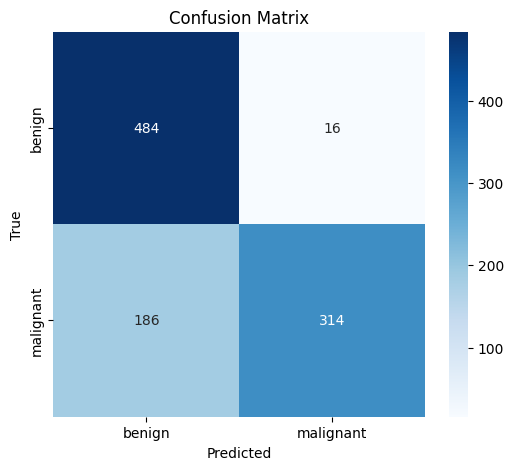

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Roc Curve and AUC

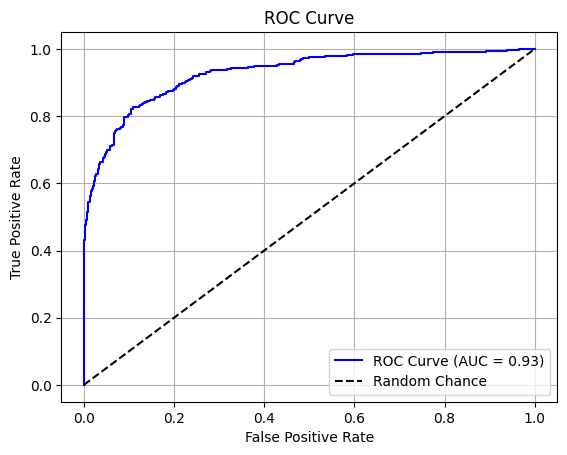

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Use probabilities of the positive class only (assumed index 1)
y_score = y_probs[:, 1]

# True binary labels
y_true_binary = (y_true == 1).astype(int)  # Adjust if 0/1 are flipped

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true_binary, y_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## To Save our Model

In [25]:
# Save model to disk
resnet_model.save("saved_model/resnet_melanoma_model.h5")  # or use a different filename per model
print("Model saved successfully.")

Model saved successfully.


### Model Saved 

In [26]:
import os
os.makedirs("saved_model", exist_ok=True)

### Complete ResNet Model 